In [4]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt

In [159]:
def simulate_gradient_descent(X_projected, w_init, num_steps = 1000, alpha = 0.01):
    
    """
    :param X_projected: original X, projected to the nullspace of a linear calssifier
    :param P: a dxd projection matrix to dimensionality d-1
    :param w_init: the initial value of w for the SGD
    :parm num_steps: number of SGD steps
    :parma alpha: learning rate
    """
    
    w = w_init.copy()
    
    for i in range(num_steps):
        
        x = random.choice(X_projected)
        w = w - alpha * x # SGD update
        
    return w
        

def plot_orthogonality_vs_number_of_sgd_steps(X, w1, P, initialize_by_zero_vector, dim):
    """
    :param X data matrix
    :param w1 a random direction in the dim-dimensional space
    :param P a projection matrix to w1's nullsapce
    :param initialize_by_zero_vector: bool, whether to initialize w2 by the zero vector
    :param dim dimensionality 
    """
    
    # project X with P
    X_projected = P.dot(X.T).T
    
    # init w2
    
    if initialize_by_zero_vector:
        w2_init = np.zeros((1,dim))
    else:
        w2_init = np.random.rand(1, dim) - 0.5
    
    dot_product_results = [] # will store the result of w1.dot(w2) 
    num_sgd_steps = range(1,10000,250)
    
    for num_steps in num_sgd_steps:
        
        # run SGD for num_steps to find w2
        w2 = simulate_gradient_descent(X_projected, w2_init, num_steps, alpha = 1)
        dot_product_results.append(w2.dot(w1.T).item())
    
    plt.plot(num_sgd_steps, dot_product_results)
    plt.xlabel("Number of SGD steps")
    plt.ylabel("w1.dot(w2)")
    plt.ylim([-0.5, 0.5])
    plt.title("orthogonality vs. # SGD steps, initialized_by_zero_vector ={}".format(initialize_by_zero_vector))
    plt.show()
    print(dot_product_results)

In [160]:
dim = 100
num_points = 5000

w1 = np.random.rand(1, dim) - 0.5 # initialize the first classifier randomly
w1 /= np.linalg.norm(w1)

X = np.random.rand(num_points, dim)
P = np.eye(dim) - w1.T.dot(w1)
assert np.allclose(P.dot(P) - P, 0.0)

w2_init = np.zeros((1,dim))
w2 = simulate_gradient_descent(P.dot(X.T).T, w2_init, num_steps = 100000, alpha = 0.1)

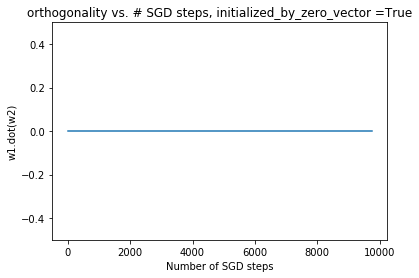

[1.1102230246251565e-16, -1.4210854715202004e-14, -4.263256414560601e-14, -1.4210854715202004e-13, -5.684341886080801e-13, 2.8421709430404007e-13, -2.8421709430404007e-13, -3.410605131648481e-13, -2.7853275241795927e-12, -2.2168933355715126e-12, -6.821210263296962e-13, -2.7284841053187847e-12, 1.0231815394945443e-12, 1.0231815394945443e-12, 2.5011104298755527e-12, 2.5011104298755527e-12, 2.2737367544323206e-12, 1.3642420526593924e-12, -2.7284841053187847e-12, 3.410605131648481e-12, 6.366462912410498e-12, -2.9558577807620168e-12, 6.821210263296962e-13, 4.547473508864641e-13, 8.640199666842818e-12, 1.000444171950221e-11, -1.3642420526593924e-12, 8.86757334228605e-12, 8.412825991399586e-12, 6.139089236967266e-12, 1.7280399333685637e-11, -3.183231456205249e-12, 1.1368683772161603e-12, 1.5916157281026244e-12, 7.275957614183426e-12, -1.6370904631912708e-11, 5.6843418860808015e-12, 2.091837814077735e-11, -1.8189894035458565e-12, 3.183231456205249e-12]


In [161]:
plot_orthogonality_vs_number_of_sgd_steps(X, w1, P, initialize_by_zero_vector = True, dim = dim)

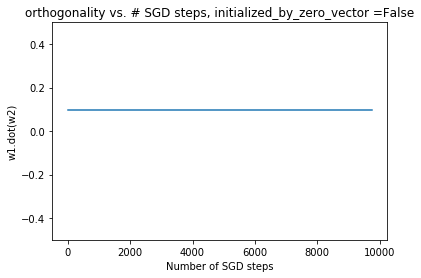

[0.09495365584397097, 0.09495365584395898, 0.0949536558441082, 0.09495365584402293, 0.09495365584302817, 0.09495365584336923, 0.09495365584405135, 0.09495365584206183, 0.09495365584513138, 0.09495365584388082, 0.09495365584439242, 0.0949536558497357, 0.09495365584837145, 0.09495365584632509, 0.09495365584893989, 0.09495365584643878, 0.09495365584791671, 0.09495365584916726, 0.09495365584177762, 0.09495365584677984, 0.09495365583870807, 0.09495365584530191, 0.09495365584166393, 0.09495365585348736, 0.09495365584530191, 0.09495365585939908, 0.0949536558428008, 0.09495365583779858, 0.09495365585985382, 0.09495365583484272, 0.09495365584871251, 0.09495365584552928, 0.09495365584120918, 0.0949536558678119, 0.09495365587258675, 0.09495365585462423, 0.09495365583188686, 0.09495365586712978, 0.0949536558609907, 0.0949536558678119]


In [163]:
plot_orthogonality_vs_number_of_sgd_steps(X, w1, P, initialize_by_zero_vector = False, dim = dim)